# <font color='green'>Processo Seletivo Oncase </font>

Gabriela Leal | Fevereiro de 2023

## **Macro Tarefa 02: Teste técnico de modelagem - Classificador**
Nessa parte, será necessário implementar um algoritmo de acordo com o paradigma do problema. Cada problema tem um conjunto de métricas que são requeridas. A variável alvo sempre será a coluna de nome “target”, exceto para os problemas não-supervisionados.

1. Construa um classificador e identifique quais variáveis exercem maior impacto sobre o “target” e informe o porquê interpretando os resultados obtidos. 

  a) métricas: precision, recall e F1-score;

  b) dados: classification_data.zip;

## 1.1 Leitura e processamento dos arquivos

IMPORTANTE: Precisa carregar os arquivos 'classification_train.csv' e 'classification_test.csv' na raiz do projeto

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Inserindo os arquivos csv de treino e teste para leitura e salvando em variáveis
train_data = pd.read_csv('classification_train.csv')
test_data = pd.read_csv('classification_test.csv')

In [ ]:
# Verificando se o arquivo treino foi inserido corretamente
train_data.head()

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1


In [ ]:
# Verificando se o arquivo teste foi inserido corretamente
test_data.head()

,x1,x2,target
0,1.114204,-0.434321,1
1,-1.238490,0.521390,0
2,-0.091781,-0.169471,1
3,0.298820,0.076368,0
4,-0.265779,0.479812,1


## 1.2 Exibindo informações iniciais dos dados

In [ ]:
print(f"O dataset de treino tem {train_data.shape[0]} linhas e {train_data.shape[1]} colunas")
print(f"O dataset de teste tem {test_data.shape[0]} linhas e {test_data.shape[1]} colunas")

O dataset de treino tem 670 linhas e 3 colunas
O dataset de teste tem 330 linhas e 3 colunas


In [ ]:
print("Lista dos tipos de dados do dataset de treino:")
train_data.info()

Lista dos tipos de dados do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      670 non-null    float64
 1   x2      670 non-null    float64
 2   target  670 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 15.8 KB


In [ ]:
print("Lista dos tipos de dados do dataset de teste:")
test_data.info()

Lista dos tipos de dados do dataset de teste:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      330 non-null    float64
 1   x2      330 non-null    float64
 2   target  330 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.9 KB


Gráfico de distribuição da variável alvo (target):


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


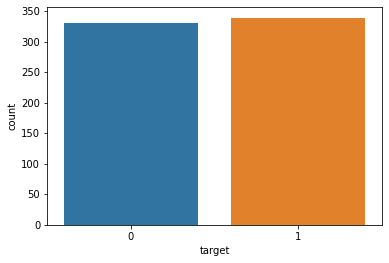

In [ ]:
print("Gráfico de distribuição da variável alvo (target):")
sns.countplot(train_data['target'], label="Count")

In [ ]:
print(f"A classe 0 representa {np.round((len(train_data[train_data.target == 0]) / train_data.shape[0])*100, 3)}% do dataset de treino")
print(f"A classe 1 representa {np.round((len(train_data[train_data.target == 1]) / train_data.shape[0])*100, 3)}% do dataset de treino")

A classe 0 representa 49.403% do dataset de treino
A classe 1 representa 50.597% do dataset de treino


Text(0.5, 1.0, 'Gráfico de dispersão')

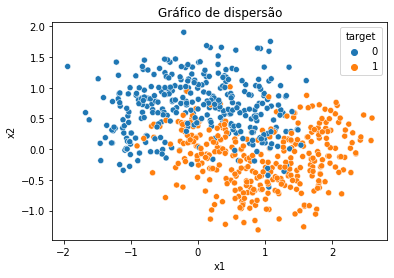

In [ ]:
# Plotando gráfico de dispersão dos dados
sns.scatterplot(x="x1", y="x2", data=train_data, hue="target").set_title("Gráfico de dispersão")

## 1.3 Tranformação e Limpeza dos dados de treinamento

### **1.3.1 Identificando dados duplicados**

In [ ]:
print(f"Quantidade de dados duplicados no dataset de treino: {train_data.duplicated().sum()}")

Quantidade de dados duplicados no dataset de treino: 0


Obs.: Caso existissem dados duplicados no dataset, ele deveriam ser retirados para não comprometer a modelagem dos dados.

### **1.3.2 Identificando dados faltantes**

In [ ]:
print("Quantidade de dados faltantes no dataset de treino:")
train_data.isna().sum()

Quantidade de dados faltantes no dataset de treino:


x1        0
x2        0
target    0
dtype: int64

Obs.: Caso existissem dados faltantes no dataset, seria necessário adotar alguma destas opções: (1) eliminar todos os registros com dados faltantes; (2) alterar os valores 'NaN' por valores substitutos. 

### **1.3.3 Identificando valores únicos**

In [ ]:
print(f"Quantidade de valores únicos na coluna x1 do dataset de treino: {len(train_data.x1.unique())}")
print(f"Quantidade de valores únicos na coluna x2 do dataset de treino: {len(train_data.x2.unique())}")

Quantidade de valores únicos na coluna x1 do dataset de treino: 670
Quantidade de valores únicos na coluna x2 do dataset de treino: 670


Obs.: Note que o dataset de treino apresenta apenas valores únicos em suas colunas, já que a quantidade de valores únicos por coluna é igual a quantidade total de linhas do dataset.

### **1.3.4 Identificando valores númericos**

In [ ]:
print("Tipos de dados do dataset de treino:")
train_data.dtypes

Tipos de dados do dataset de treino:


x1        float64
x2        float64
target      int64
dtype: object

Obs.: A implementação atual da biblioteca sklearn só oferece suporte a dados numéricos, por isso é muito importante verificar o tipo do dado presente no dataset. Caso existissem dados não numéricos, seria necessário utlizar alguma tecnica de codificação de variáveis categoricas como One-hot encoding e Ordinal encoding, por exemplo.

### **1.3.5 Identificando outliers**

In [ ]:
print("Dados estatísticos básicos do dataset de treino:")
train_data.describe()

Dados estatísticos básicos do dataset de treino:


,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


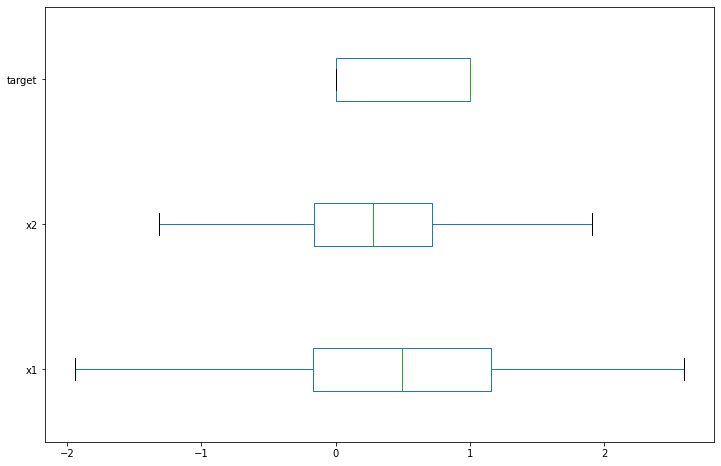

In [ ]:
# Plotando boxplot para observar a distribuição dos dados
train_data.boxplot(figsize=(12,8), grid=False, vert=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2bdd9a1a90>,
      dtype=object)

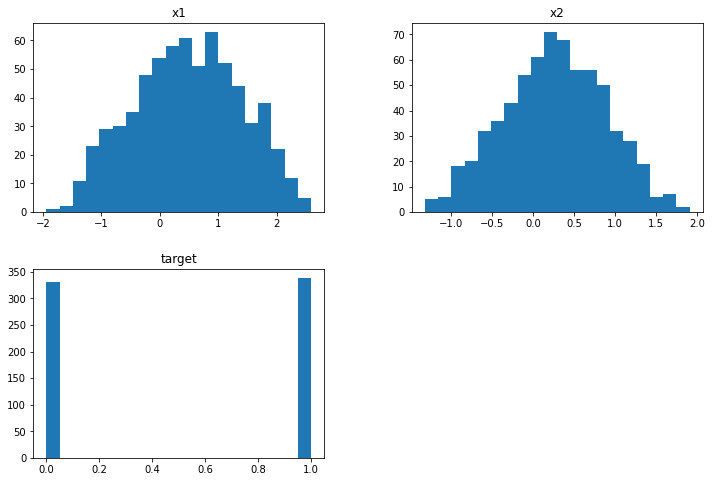

In [ ]:
# Plotando histograma para observar a distribuição dos dados
train_data.hist(figsize=(12,8), bins=20, grid=False)

Método Amplitude interquartil

Feature x1

In [ ]:
# Analisando a amplitude interquartil para a feature x1
q1_x1, q3_x1 = np.percentile(train_data.x1, [25 , 75])
Amp_interquartil_x1 = q3_x1 - q1_x1

print("Primeiro Quartil da feature x1:", q1_x1)
print("Terciro Quartil da feature x1:", q3_x1)
print("Amplitude interquatil para a feature x1:", Amp_interquartil_x1, "\n")

# Determinando o limite inferior e superior para a feature x1
limite_inferior_x1 = q1_x1 - (1.5 * Amp_interquartil_x1)
limite_superior_x1 = q3_x1 + (1.5 * Amp_interquartil_x1)

print("Limite Inferior da feature x1: ", limite_inferior_x1)
print("Limite Superior da feature x1: ", limite_superior_x1)

Primeiro Quartil da feature x1: -0.16961503148156787
Terciro Quartil da feature x1: 1.159680083074392
Amplitude interquatil para a feature x1: 1.32929511455596 

Limite Inferior da feature x1:  -2.163557703315508
Limite Superior da feature x1:  3.1536227549083318


In [ ]:
# Verificando se existem dados fora dos limites encontrados da feature x1
outliers = len(train_data[(train_data.x1 < limite_inferior_x1) | (train_data.x1 > limite_superior_x1)])
print(f"Número de outliers da feature x1: {outliers}")

Número de outliers da feature x1: 0


Feature x2

In [ ]:
# Analisando a amplitude interquartil para a feature x2
q1_x2, q3_x2 = np.percentile(train_data.x2, [25 , 75])
Amp_interquartil_x2 = q3_x2 - q1_x2

print("Primeiro Quartil da feature x2:", q1_x2)
print("Terciro Quartil da feature x2:", q3_x2)
print("Amplitude interquatil para a feature x2:", Amp_interquartil_x2, "\n")

# Determinando o limite inferior e superior para a feature x2
limite_inferior_x2 = q1_x2 - (1.5 * Amp_interquartil_x2)
limite_superior_x2 = q3_x2 + (1.5 * Amp_interquartil_x2)

print("Limite Inferior da feature x2:", limite_inferior_x2)
print("Limite Superior da feature x2:", limite_superior_x2)

Primeiro Quartil da feature x2: -0.15918907454552478
Terciro Quartil da feature x2: 0.7175894685716113
Amplitude interquatil para a feature x2: 0.8767785431171361 

Limite Inferior da feature x2: -1.4743568892212289
Limite Superior da feature x2: 2.0327572832473155


In [ ]:
# Verificando se existem dados fora dos limites encontrados da feature x2
outliers = len(train_data[(train_data.x2 < limite_inferior_x2) | (train_data.x2 > limite_superior_x2)])
print(f"Número de outliers da feature x2: {outliers}")

Número de outliers da feature x2: 0


<font color='green'>**CONCLUSÕES IMPORTANTES:**</font>

*   Os dados das variáveis x1 e x2 do dataset de treino seguem uma distribuição semelhante a ditribuição gaussiana;
*   Foi comprovado pelo método amplitude interquartil e pela plotagem do boxplot que que não existem outliers no dataset de treino;
* O gráfico de distribução da variavel alvo (target) evidencia que há uma distribução equilibrada entre os dados do dataset de treino;



## 2. Modelo de Machine Learning

### 2.1 Escolha do algoritmo
Para a etapa de modelagem foi escolhido o algoritmo Decision Trees (Arvore de Recisão), já que ele apresenta uma estrutura visual similar a de um fluxograma, com etapas muito faceis de visualizar e entender.

Além disso, comparado com outros algorismos de classificação, ele exige um esforço menor de preparação dos dados durante o pré processamento, sem precisar fazer normalização, criação de variáveis fictícias e remoção de valores em branco.






### 2.2 Divisão da base de dados

In [ ]:
# Importando biblioteca para o modelo
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Separando atributos e target
y = train_data['target']
X = train_data.drop(columns=['target'])

# Definindo o percentual do conjunto de validação
tamanho_val = 0.3

# Divisão do conjunto de treino e valiadação
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

### 2.3 Treinamento do modelo

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train, y_train)

y_predict_val = decision_tree.predict(X_val)

In [ ]:
# Identificando as features mais importantes para o modelo em questão
for importancia in zip(X.columns, decision_tree.feature_importances_):
  print(importancia)

('x1', 0.3557399002217117)
('x2', 0.6442600997782882)


Obs.: A feature mais importante para o modelo é 'x2'.

Populating the interactive namespace from numpy and matplotlib


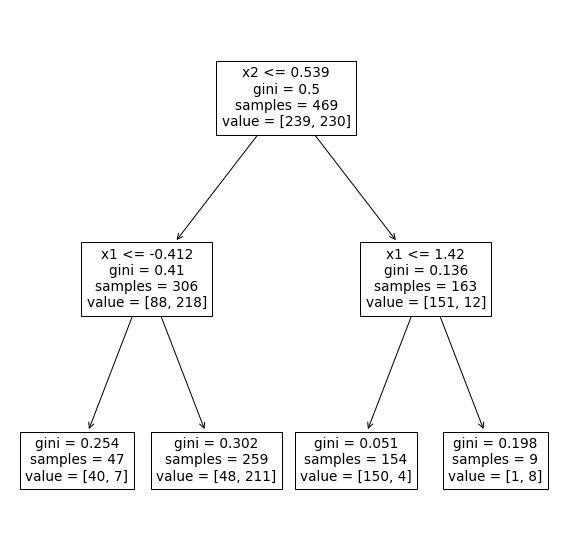

In [ ]:
# Plotando Gráfico da árvore de decisão
from sklearn.tree import plot_tree
%pylab inline

fig,ax = pylab.subplots(1,1, figsize = (10,10))
plot_tree(decision_tree, ax = ax, feature_names = X_train.columns);

Obs.: A profundidade da árvore foi definida através do parametro max_depth=2, durante o treinamento do modelo. Note que a árvore de decisão não é muito profunda, o que significa que o modelo não é complexo. Cabe destacar que é importante evitar a construção de arvores de decisão muito profundas para prevenir a ocorrencia de overfitting.  

### 2.4 Métricas de avaliação do modelo

*   **Acuracia**: Indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
*   **Precisão**: Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
*   **Revocação**: Dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
*   **F1-Score**: Média harmônica entre precisão e recall;
*   **roc_auc_score** : Informa o quanto o modelo está conseguindo distinguir as classes, ou seja, classificar 0 como 0 e 1 como 1.



Matriz de confusão

In [ ]:
matriz_confusao = confusion_matrix(y_val, y_predict_val)
matriz_confusao

array([[ 70,  22],
       [  7, 102]])

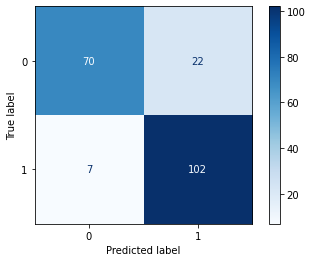

In [ ]:
mc = ConfusionMatrixDisplay(matriz_confusao)
mc.plot(cmap="Blues")
plt.show()

In [ ]:
vn, fp, fn, vp = matriz_confusao[0][0], matriz_confusao[0][1], matriz_confusao[1][0], matriz_confusao[1][1]

2.4.1 Acurácia

In [ ]:
# Utilizando a formula
acuracia = (vp + vn) / (vp + vn + fp + fn)
acuracia

# Utilizando a biblioteca
acuracia_ = metrics.accuracy_score(y_val, y_predict_val)
acuracia_

print(f"Acuracia do modelo: {acuracia}")
print(f"Acuracia do modelo: {acuracia_}")

Acuracia do modelo: 0.8557213930348259
Acuracia do modelo: 0.8557213930348259


2.4.2 Precisão

In [ ]:
# Utilizando a formula
precisao = vp/(vp + fp)
precisao

# Utilizando a biblioteca
precisao_ = metrics.precision_score(y_val, y_predict_val)
precisao_

print(f"Precisão do modelo: {precisao}")
print(f"Precisão do modelo: {precisao_}")

Precisão do modelo: 0.8225806451612904
Precisão do modelo: 0.8225806451612904


2.4.3 Revocação

In [ ]:
# Utilizando a formula
recall = vp / (vp + fn)
recall

# Utilizando a biblioteca
recall_ = metrics.recall_score(y_val, y_predict_val)
recall

print(f"Revocação do modelo: {recall}")
print(f"Revocação do modelo: {recall_}")

Revocação do modelo: 0.9357798165137615
Revocação do modelo: 0.9357798165137615


2.4.4 F1-Score

In [ ]:
# Utilizando a formula
f1_score = 2*(precisao*recall / (precisao+recall))

print(f"F1 Score do modelo: {f1_score}")

F1 Score do modelo: 0.8755364806866953


In [ ]:
# Plotagem conjunta das métricas
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        92
           1       0.82      0.94      0.88       109

    accuracy                           0.86       201
   macro avg       0.87      0.85      0.85       201
weighted avg       0.86      0.86      0.85       201



2.4.5 Curva ROC

In [ ]:
# Curva ROC
np.round(roc_auc_score(y_val, y_predict_val),4)

0.8483

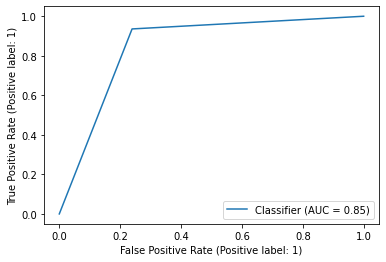

In [ ]:
# Plotando Gráfico de Curva ROC
RocCurveDisplay.from_predictions(y_val, y_predict_val)